# Oakland Street Service Requests 2009
### I'm going to try to map all the street deterioration service requests in Oakland in 2009.

I will also try to see if I can graph the average turnaround time for service requests to be closed from the time they were opened. It would be cool to see where the longest turnaround times are vs. the shortest. 

I will import a bunch of libraries now, not sure if I'll end up using all of them but we shall see.

In [1]:
import geopandas as gpd
import folium
import pandas as pd
import contextily as ctx

I already manipulated my data a bunch in Excel because it was really messy before. I put the locations in separate columns where they were previously in one, and I also added a column that calculated the time it took for a request to be resolved. There were a few requests that were either cancelled or left open/unresolved and have a label like "unfunded." I'm not sure whether I'm going to keep that, but for now, I put their turnaround time as 40,000 days because I want to be able to sort them out if I need. I will just have to make sure to get rid of those rows before trying to find the average otherwise I'll get totally skewed data.

In [2]:
oakland09 = gpd.read_file('oakland09data.csv')

Now that I've imported the libraries and uploaded my data, I'd like to see what the top of it looks like.

In [3]:
oakland09.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,"37.78827341554735,",-122.1901048,UNFUNDED,,CCD4,4448 PAMPAS AV,Oakland,CA,40000,None
1,"323,234",12/4/2009 16:20,Phone or Email,Streets - Potholes/Depression,STREETSW,"37.827783911702205,",-122.1948242,CANCEL,,CCD4,8 RYDAL CT,Oakland,CA,40000,None
2,"323,034",12/2/2009 12:51,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,"37.806380392636356,",-122.2072523,UNFUNDED,,CCD4,4100 LINCOLN AVE,Oakland,CA,40000,None
3,"323,003",12/2/2009 10:23,Phone or Email,Streets - Street Deterioration,STREETSW,"37.83726266269269,",-122.2257336,CLOSED,,CCD1,HARBORD DR & FLORENCE AV,Oakland,CA,40000,None
4,"321,683",11/13/2009 12:58,Phone or Email,Streets - Street Deterioration,STREETSW,"37.81606614536522,",-122.26249,UNFUNDED,,CCD3,275 28TH ST,Oakland,CA,40000,None


I have this organized by the longest time it took to close a request, so basically it's pretty wonky right now but I am concerned about mapping it so I want to see if I'll be able to do that with my current coordinates.

<AxesSubplot:>

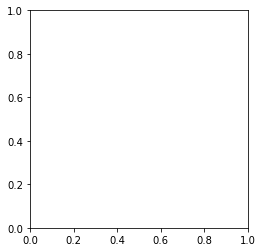

In [4]:
oakland09.plot()

Okay, yeah, I think I need to do some more things with this data before I try mapping it. Maybe I should check the types of data each column is.

In [5]:
oakland09.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        526 non-null    object  
 1   DATETIMEINIT     526 non-null    object  
 2   SOURCE           526 non-null    object  
 3   DESCRIPTION      526 non-null    object  
 4   REQCATEGORY      526 non-null    object  
 5   LAT              526 non-null    object  
 6   LONG             526 non-null    object  
 7   STATUS           526 non-null    object  
 8   DATETIMECLOSED   526 non-null    object  
 9   COUNCILDISTRICT  526 non-null    object  
 10  PROBADDRESS      526 non-null    object  
 11  City             526 non-null    object  
 12  State            526 non-null    object  
 13  TIMETOCLOSE      526 non-null    object  
 14  geometry         0 non-null      geometry
dtypes: geometry(1), object(14)
memory usage: 61.8+ KB


So I would guess that geopandas doesn't recognize the coordinates as coordinates because they should be floats? Maybe I can try to fix that

In [6]:
LAT = oakland09['LAT']

In [7]:
type('LAT')

str

In [8]:
LAT = float('LAT')

ValueError: could not convert string to float: 'LAT'

Uh oh.

I know that with geopandas, the dtypes are different, so shouldn't it be float64 or int64? Presumably float64 because then it will keep the decimal points. uhhhh

In [9]:
import matplotlib.pyplot as plt

In [10]:
oakland09['LAT'] = oakland09['LAT'].astype(float64)

NameError: name 'float64' is not defined

I did even more googling so I am going to reupload the new csv where I took out the parentheses. and thennnn maybe do some more stuff like adding points to the lat+long so that it reads correctly?

In [11]:
oakland09 = gpd.read_file('oakland09data.csv')

In [12]:
oakland09.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,"37.78827341554735,",-122.1901048,UNFUNDED,,CCD4,4448 PAMPAS AV,Oakland,CA,40000,None
1,"323,234",12/4/2009 16:20,Phone or Email,Streets - Potholes/Depression,STREETSW,"37.827783911702205,",-122.1948242,CANCEL,,CCD4,8 RYDAL CT,Oakland,CA,40000,None
2,"323,034",12/2/2009 12:51,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,"37.806380392636356,",-122.2072523,UNFUNDED,,CCD4,4100 LINCOLN AVE,Oakland,CA,40000,None
3,"323,003",12/2/2009 10:23,Phone or Email,Streets - Street Deterioration,STREETSW,"37.83726266269269,",-122.2257336,CLOSED,,CCD1,HARBORD DR & FLORENCE AV,Oakland,CA,40000,None
4,"321,683",11/13/2009 12:58,Phone or Email,Streets - Street Deterioration,STREETSW,"37.81606614536522,",-122.26249,UNFUNDED,,CCD3,275 28TH ST,Oakland,CA,40000,None


Okay, cool. When I googled it, a site said maybe try importing shapely and geometry

In [13]:
from shapely.geometry import Point, Polygon

I don't really know what that means but I'm going to try it anyway?? We'll see what happens

<AxesSubplot:>

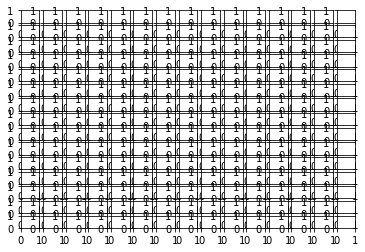

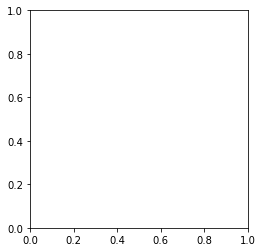

In [14]:
fig,ax=plt.subplots(15,15)
oakland09.plot()

jesus mary and joseph what have i done

now that i've summoned a demon, i will try something different

maybe just plot it again now that I have the shapely file?

<AxesSubplot:>

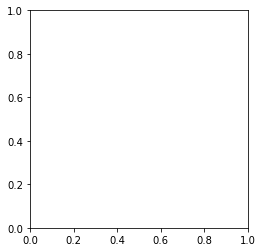

In [15]:
oakland09.plot()

In [16]:
oakland09.tail()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry
521,"317,437",10/5/2009 12:11,Phone or Email,Streets - Potholes/Depression,STREETSW,"37.819131773347515,",-122.2534458,CLOSED,10/5/2009 14:09,CCD2,OAKLAND AV & SANTA CLARA AV,Oakland,CA,0.1,None
522,"317,054",9/30/2009 13:50,Phone or Email,Streets - Potholes/Depression,STREETSW,"37.779466791581314,",-122.205585,CLOSED,9/30/2009 15:09,CCD5,CONGRESS AV & COURTLAND AV,Oakland,CA,0.1,None
523,"322,684",11/25/2009 11:17,Phone or Email,Streets/Sidewalks - Portable Barriers Maint,STREETSW,"37.8640620568929,",-122.2332864,CLOSED,11/25/2009 11:20,CCD1,CLAREMONT AV & RISPIN DR,Oakland,CA,0,None
524,"317,946",10/8/2009 15:58,Phone or Email,Streets - Potholes/Depression,STREETSW,"37.8329652282042,",-122.2648865,CLOSED,10/8/2009 16:00,CCD1,541 45TH STREET,Oakland,CA,0,None
525,"323,244",12/6/2009 16:28,Phone or Email,Streets - Potholes/Depression,STREETSW,"37.84602323049844,",-122.2548987,CLOSED,12/6/2009 16:30,CCD1,5800 CLAREMONT AVE,Oakland,CA,0,None


Okay, so somehow it worked when I plotted it but then the kernel died and once I restarted it and re-ran the cells, the points within Oakland aren't showing up anymore.

In [17]:
type(oakland09)

geopandas.geodataframe.GeoDataFrame

In [18]:
oakland_plot = oakland09[['LAT','LONG']]

In [19]:
oakland_plot

,LAT,LONG
0,"37.78827341554735,",-122.1901048
1,"37.827783911702205,",-122.1948242
2,"37.806380392636356,",-122.2072523
3,"37.83726266269269,",-122.2257336
4,"37.81606614536522,",-122.26249
...,...,...
521,"37.819131773347515,",-122.2534458
522,"37.779466791581314,",-122.205585
523,"37.8640620568929,",-122.2332864
524,"37.8329652282042,",-122.2648865


Is it the commas???

In [23]:
oakland_09 = gpd.read_file('oakland_data_update.csv')
oakland_09.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,37.78827342,-122.1901048,UNFUNDED,,CCD4,4448 PAMPAS AV,Oakland,CA,40000,None
1,"323,234",12/4/2009 16:20,Phone or Email,Streets - Potholes/Depression,STREETSW,37.82778391,-122.1948242,CANCEL,,CCD4,8 RYDAL CT,Oakland,CA,40000,None
2,"323,034",12/2/2009 12:51,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,37.80638039,-122.2072523,UNFUNDED,,CCD4,4100 LINCOLN AVE,Oakland,CA,40000,None
3,"323,003",12/2/2009 10:23,Phone or Email,Streets - Street Deterioration,STREETSW,37.83726266,-122.2257336,CLOSED,,CCD1,HARBORD DR & FLORENCE AV,Oakland,CA,40000,None
4,"321,683",11/13/2009 12:58,Phone or Email,Streets - Street Deterioration,STREETSW,37.81606615,-122.26249,UNFUNDED,,CCD3,275 28TH ST,Oakland,CA,40000,None


Okay maybe now I can plot it but I will not count on it

<AxesSubplot:>

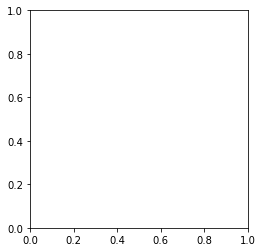

In [24]:
oakland_09.plot()

Hmmmmmmm

In [25]:
df = pd.read_csv('oakland_data_update.csv')
crs = {'init': 'espg:4326'}
df.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,37.788273,-122.190105,UNFUNDED,NaN,CCD4,4448 PAMPAS AV,Oakland,CA,40000.0
1,"323,234",12/4/2009 16:20,Phone or Email,Streets - Potholes/Depression,STREETSW,37.827784,-122.194824,CANCEL,NaN,CCD4,8 RYDAL CT,Oakland,CA,40000.0
2,"323,034",12/2/2009 12:51,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,37.806380,-122.207252,UNFUNDED,NaN,CCD4,4100 LINCOLN AVE,Oakland,CA,40000.0
3,"323,003",12/2/2009 10:23,Phone or Email,Streets - Street Deterioration,STREETSW,37.837263,-122.225734,CLOSED,NaN,CCD1,HARBORD DR & FLORENCE AV,Oakland,CA,40000.0
4,"321,683",11/13/2009 12:58,Phone or Email,Streets - Street Deterioration,STREETSW,37.816066,-122.262490,UNFUNDED,NaN,CCD3,275 28TH ST,Oakland,CA,40000.0


I googled a bunch of different things and I found something that might help me make my coordinates into Points for a new geometry column, so I will try that. I am not sure what I did after i restarted the kernel so that the coordinate points didn't show up as a map, but I definitely did something slightly different so it hasn't shown up this time around.

<AxesSubplot:>

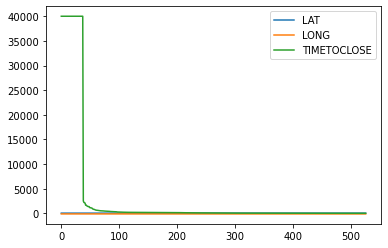

In [29]:
df.plot()

In [30]:
geometry = [Point(xy) for xy in zip( df["LONG"], df["LAT"])]
geometry[:5]

In [45]:
oakland_09.columns.to_list()

['REQUESTID',
 'DATETIMEINIT',
 'SOURCE',
 'DESCRIPTION',
 'REQCATEGORY',
 'LAT',
 'LONG',
 'STATUS',
 'DATETIMECLOSED',
 'COUNCILDISTRICT',
 'PROBADDRESS',
 'City',
 'State',
 'TIMETOCLOSE',
 'geometry']

In [46]:
oakland_09[['REQUESTID',
 'DATETIMEINIT',
 'SOURCE',
 'DESCRIPTION',
 'REQCATEGORY',
 'LAT',
 'LONG',
 'STATUS',
 'DATETIMECLOSED',
 'COUNCILDISTRICT',
 'PROBADDRESS',
 'City',
 'State',
 'TIMETOCLOSE',]]

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE
0,"323,439",12/8/2009 11:05,Phone or Email,Streets - Street Deterioration,STREETSW,37.78827342,-122.1901048,UNFUNDED,,CCD4,4448 PAMPAS AV,Oakland,CA,40000
1,"323,234",12/4/2009 16:20,Phone or Email,Streets - Potholes/Depression,STREETSW,37.82778391,-122.1948242,CANCEL,,CCD4,8 RYDAL CT,Oakland,CA,40000
2,"323,034",12/2/2009 12:51,Phone or Email,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,37.80638039,-122.2072523,UNFUNDED,,CCD4,4100 LINCOLN AVE,Oakland,CA,40000
3,"323,003",12/2/2009 10:23,Phone or Email,Streets - Street Deterioration,STREETSW,37.83726266,-122.2257336,CLOSED,,CCD1,HARBORD DR & FLORENCE AV,Oakland,CA,40000
4,"321,683",11/13/2009 12:58,Phone or Email,Streets - Street Deterioration,STREETSW,37.81606615,-122.26249,UNFUNDED,,CCD3,275 28TH ST,Oakland,CA,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"317,437",10/5/2009 12:11,Phone or Email,Streets - Potholes/Depression,STREETSW,37.81913177,-122.2534458,CLOSED,10/5/2009 14:09,CCD2,OAKLAND AV & SANTA CLARA AV,Oakland,CA,0.1
522,"317,054",9/30/2009 13:50,Phone or Email,Streets - Potholes/Depression,STREETSW,37.77946679,-122.205585,CLOSED,9/30/2009 15:09,CCD5,CONGRESS AV & COURTLAND AV,Oakland,CA,0.1
523,"322,684",11/25/2009 11:17,Phone or Email,Streets/Sidewalks - Portable Barriers Maint,STREETSW,37.86406206,-122.2332864,CLOSED,11/25/2009 11:20,CCD1,CLAREMONT AV & RISPIN DR,Oakland,CA,0
524,"317,946",10/8/2009 15:58,Phone or Email,Streets - Potholes/Depression,STREETSW,37.83296523,-122.2648865,CLOSED,10/8/2009 16:00,CCD1,541 45TH STREET,Oakland,CA,0


In [47]:
oakland_09 = oakland_09[['REQUESTID',
 'DATETIMEINIT',
 'SOURCE',
 'DESCRIPTION',
 'REQCATEGORY',
 'LAT',
 'LONG',
 'STATUS',
 'DATETIMECLOSED',
 'COUNCILDISTRICT',
 'PROBADDRESS',
 'City',
 'State',
 'TIMETOCLOSE',]]

In [48]:
oakland_09.sample()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE
138,"321,504",11/12/2009 11:09,Phone or Email,Streets - Potholes/Depression,STREETSW,37.83513085,-122.2261308,CLOSED,5/12/2010 12:08,CCD1,CLAREWOOD DR & HARBORD DR,Oakland,CA,181


In [50]:
geometry = [Point(xy) for xy in zip( df["LONG"], df["LAT"])]

In [54]:
geometry[:3]

Okay, so I guess I have somehow created geometric points, but I am not sure how to add that into my dataframe. I triedjust adding geometry as a column but got an error saying that 'geometry' doesn't exist, so I think I have to go about it another way.